In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import yfinance as yf
from dateutil.relativedelta import relativedelta

In [2]:
Stardate=datetime(2005, 1, 1)
Enddate=datetime(2011, 12, 31)

tck_DJ_data = yf.download('^DJI', Stardate-timedelta(weeks=1),Enddate)
Close_DJ_data=pd.DataFrame(tck_DJ_data['Close'])


[*********************100%***********************]  1 of 1 completed


In [3]:
Close_DJ_data=  Close_DJ_data.reset_index()
Close_DJ_data.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [4]:
Close_DJ_data.head(5)

,Date,Close
0,2004-12-27,10776.129883
1,2004-12-28,10854.540039
2,2004-12-29,10829.190430
3,2004-12-30,10800.299805
4,2004-12-31,10783.009766


In [5]:
print(datetime(2004,12, 27)==Close_DJ_data['Date'][0])

True


In [6]:
Close_DJ_data = (Close_DJ_data.set_index('Date')
      .reindex(pd.date_range(Stardate-timedelta(weeks=1), Enddate, freq='D'))
      .rename_axis(['Date'])
      .fillna(method='ffill')
      .dropna()
      .reset_index())

In [7]:
paper = pd.read_csv('PreisMoatStanley2013.dat',delimiter=' ', parse_dates =[0,1,100,101] )


In [8]:
df_gt=pd.DataFrame({'GoogleWE':paper['Google End Date'],'debt':paper['debt'].astype(np.float64),\
    'DJIADate':paper['DJIA Date'],'DJIAClose':paper['DJIA Closing Price'].astype(np.float64)})


In [9]:
df_gt = (df_gt.set_index('GoogleWE')
      .reindex(pd.date_range(Stardate-timedelta(weeks=1), Enddate, freq='D'))
      .rename_axis(['GoogleWE'])
      .fillna(method='ffill')
      .dropna()
      .reset_index())

In [10]:
inital_date=datetime(2005,1,3)
for i in range(5):
    print(inital_date-timedelta(weeks=i))

2005-01-03 00:00:00
2004-12-27 00:00:00
2004-12-20 00:00:00
2004-12-13 00:00:00
2004-12-06 00:00:00


In [11]:
df_gt.head()

,GoogleWE,debt,DJIADate,DJIAClose
0,2004-12-25,0.133333,2004-12-27,10776.13
1,2004-12-26,0.133333,2004-12-27,10776.13
2,2004-12-27,0.133333,2004-12-27,10776.13
3,2004-12-28,0.133333,2004-12-27,10776.13
4,2004-12-29,0.133333,2004-12-27,10776.13


In [12]:
df_gt.dtypes

GoogleWE     datetime64[ns]
debt                float64
DJIADate     datetime64[ns]
DJIAClose           float64
dtype: object

In [13]:
Cnsl_db = pd.merge(Close_DJ_data, df_gt, how='inner', left_on = 'Date', right_on='GoogleWE')

In [14]:
Cnsl_db=Cnsl_db.loc[Cnsl_db['Date']>=Stardate+timedelta(days=2)]

In [15]:
Cnsl_db.head(5)

,Date,Close,GoogleWE,debt,DJIADate,DJIAClose
7,2005-01-03,10729.429688,2005-01-03,0.16,2005-01-03,10729.43
8,2005-01-04,10630.780273,2005-01-04,0.16,2005-01-03,10729.43
9,2005-01-05,10597.830078,2005-01-05,0.16,2005-01-03,10729.43
10,2005-01-06,10622.879883,2005-01-06,0.16,2005-01-03,10729.43
11,2005-01-07,10603.959961,2005-01-07,0.16,2005-01-03,10729.43


In [16]:
Cnsl_db2 = (Cnsl_db.set_index('Date')
      .reindex(pd.date_range(Stardate+timedelta(days=2), Enddate, freq='W-MON'))
      .rename_axis(['Date'])
      .dropna()
      .reset_index())

<AxesSubplot:xlabel='Date'>

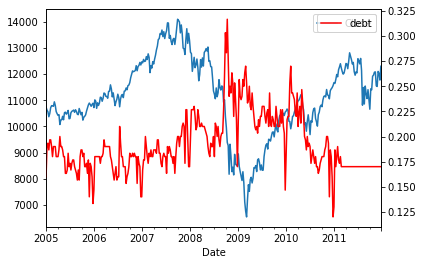

In [17]:
ax = Cnsl_db2.plot('Date','Close')
ax1 = ax.twinx()
Cnsl_db2.plot('Date','debt',ax=ax1, color='r')

In [18]:
Google_trends=pd.read_csv('debt_google_trend.csv')
Google_trends['Mes']=Google_trends['Mes'].astype('datetime64[ns]')

In [19]:
Google_trends = (Google_trends.set_index('Mes')
      .reindex(pd.date_range(Stardate-timedelta(weeks=1), Enddate, freq='D'))
      .rename_axis(['Mes'])
      .fillna(method='ffill')
      .dropna()
      .reset_index())

In [20]:
Cnsl_db_Gtr = pd.merge(Close_DJ_data, Google_trends, how='inner', left_on = 'Date', right_on='Mes')

In [21]:
Cnsl_db_Gtr=Cnsl_db_Gtr.loc[Cnsl_db_Gtr['Date']>=Stardate+timedelta(days=2)]

In [22]:
Cnsl_db_Gtr2 = (Cnsl_db_Gtr.set_index('Date')
      .reindex(pd.date_range(Stardate+timedelta(days=2), Enddate, freq='W-MON'))
      .rename_axis(['Date'])
      .dropna()
      .reset_index())

<AxesSubplot:xlabel='Date'>

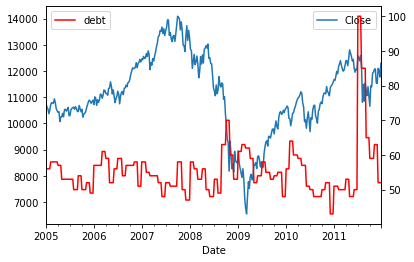

In [23]:
ax = Cnsl_db_Gtr2.plot('Date','Close')
ax1 = ax.twinx()
Cnsl_db_Gtr2.plot('Date','debt',ax=ax1, color='r')

In [46]:
try:
    del StrategyDataframe
    StrategyDataframe=Cnsl_db_Gtr2.copy()
except:
    StrategyDataframe=Cnsl_db_Gtr2.copy()
StrategyDataframe['DJRet']=StrategyDataframe['Close']/StrategyDataframe222['Close'].shift(1)-1
StrategyDataframe['MovAvg']=StrategyDataframe['debt'].rolling(3).mean()
StrategyDataframe['MovAvg']=StrategyDataframe['MovAvg'].shift(1)
StrategyDataframe.head(10)

,Date,Close,Mes,debt,DJRet,MovAvg
0,2005-01-03,10729.429688,2005-01-03,56.0,NaN,NaN
1,2005-01-10,10621.030273,2005-01-10,56.0,-0.010103,NaN
2,2005-01-17,10558.000000,2005-01-17,56.0,-0.005934,NaN
3,2005-01-24,10368.610352,2005-01-24,56.0,-0.017938,56.000000
4,2005-01-31,10489.940430,2005-01-31,56.0,0.011702,56.000000
5,2005-02-07,10715.759766,2005-02-07,58.0,0.021527,56.000000
6,2005-02-14,10791.129883,2005-02-14,58.0,0.007034,56.666667
7,2005-02-21,10785.219727,2005-02-21,58.0,-0.000548,57.333333
8,2005-02-28,10766.230469,2005-02-28,58.0,-0.001761,58.000000
9,2005-03-07,10936.860352,2005-03-07,58.0,0.015849,58.000000


In [47]:
StrategyDataframe['Signal']=np.sign(StrategyDataframe['MovAvg']-StrategyDataframe['debt'])
StrategyDataframe['Signal']=StrategyDataframe['Signal'].shift(1)
StrategyDataframe['Signal']=StrategyDataframe['Signal'].replace(to_replace=0, method='ffill')
StrategyDataframe['SRet']=StrategyDataframe['Signal']*StrategyDataframe['DJRet']
StrategyDataframe['DJCumRet']=(1+StrategyDataframe['DJRet'] ).cumprod()
StrategyDataframe['SCumRet']=(1+StrategyDataframe['SRet'] ).cumprod()
StrategyDataframe['DJCumRet']=StrategyDataframe['DJCumRet'].fillna(1)
StrategyDataframe['SCumRet']=StrategyDataframe['SCumRet'].fillna(1)
StrategyDataframe.head(10)

,Date,Close,Mes,debt,DJRet,MovAvg,Signal,SRet,DJCumRet,SCumRet
0,2005-01-03,10729.429688,2005-01-03,56.0,NaN,NaN,NaN,NaN,1.000000,1.000000
1,2005-01-10,10621.030273,2005-01-10,56.0,-0.010103,NaN,NaN,NaN,0.989897,1.000000
2,2005-01-17,10558.000000,2005-01-17,56.0,-0.005934,NaN,NaN,NaN,0.984022,1.000000
3,2005-01-24,10368.610352,2005-01-24,56.0,-0.017938,56.000000,NaN,NaN,0.966371,1.000000
4,2005-01-31,10489.940430,2005-01-31,56.0,0.011702,56.000000,NaN,NaN,0.977679,1.000000
5,2005-02-07,10715.759766,2005-02-07,58.0,0.021527,56.000000,NaN,NaN,0.998726,1.000000
6,2005-02-14,10791.129883,2005-02-14,58.0,0.007034,56.666667,-1.0,-0.007034,1.005751,0.992966
7,2005-02-21,10785.219727,2005-02-21,58.0,-0.000548,57.333333,-1.0,0.000548,1.005200,0.993510
8,2005-02-28,10766.230469,2005-02-28,58.0,-0.001761,58.000000,-1.0,0.001761,1.003430,0.995260
9,2005-03-07,10936.860352,2005-03-07,58.0,0.015849,58.000000,-1.0,-0.015849,1.019333,0.979486


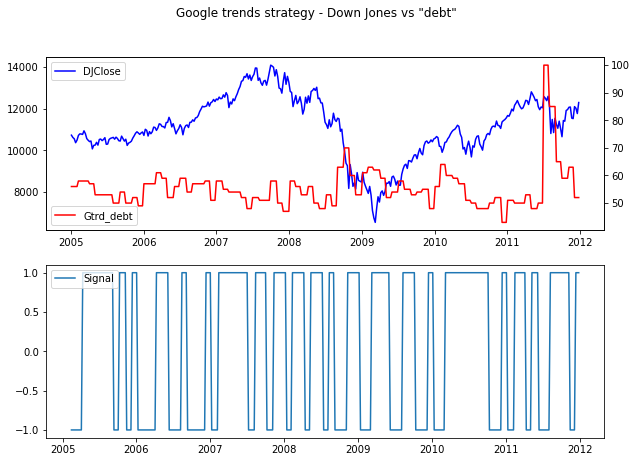

In [108]:
fig, axs = plt.subplots(2,figsize=(10,7))
fig
fig.suptitle('Google trends strategy - Down Jones vs "debt"')
axs0=axs[0].twinx()
axs[0].plot(StrategyDataframe['Date'], StrategyDataframe['Close'], color='blue',label='DJClose') 
axs0.plot(StrategyDataframe['Date'], StrategyDataframe['debt'], color='red',label='Gtrd_debt')
axs[1].plot(StrategyDataframe['Date'],StrategyDataframe['Signal'],label='Signal')
axs[0].legend(loc='upper left')
axs0.legend(loc='lower left')
axs[1].legend(loc='upper left')


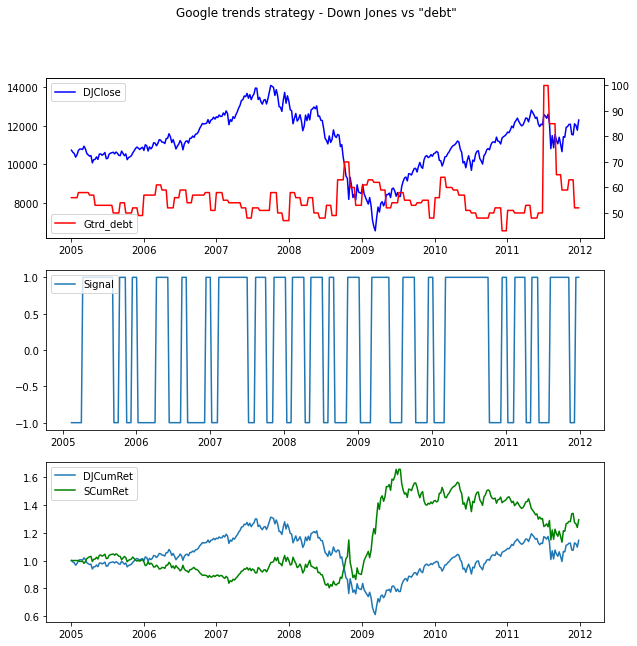

In [109]:
fig, axs = plt.subplots(3,figsize=(10,10))
fig
fig.suptitle('Google trends strategy - Down Jones vs "debt"')
axs0=axs[0].twinx()
axs[0].plot(StrategyDataframe['Date'], StrategyDataframe['Close'],color='blue',label='DJClose') 
axs0.plot(StrategyDataframe['Date'], StrategyDataframe['debt'],color='red',label='Gtrd_debt')
axs[1].plot(StrategyDataframe['Date'],StrategyDataframe['Signal'],label='Signal')
axs[2].plot(StrategyDataframe['Date'],StrategyDataframe['DJCumRet'],label='DJCumRet')
axs[2].plot(StrategyDataframe['Date'],StrategyDataframe['SCumRet'],color='green',label='SCumRet')
axs[0].legend(loc='upper left')
axs0.legend(loc='lower left')
axs[1].legend(loc='upper left')
axs[2].legend(loc='upper left')


In [51]:
StrategyDataframe.tail(10)

,Date,Close,Mes,debt,DJRet,MovAvg,Signal,SRet,DJCumRet,SCumRet
355,2011-10-24,11913.620117,2011-10-24,59.0,0.045329,59.000000,1.0,0.045329,1.110368,1.265748
356,2011-10-31,11955.009766,2011-10-31,59.0,0.003474,59.000000,1.0,0.003474,1.114226,1.270145
357,2011-11-07,12068.389648,2011-11-07,63.0,0.009484,59.000000,1.0,0.009484,1.124793,1.282191
358,2011-11-14,12078.980469,2011-11-14,63.0,0.000878,60.333333,-1.0,-0.000878,1.125780,1.281066
359,2011-11-21,11547.309570,2011-11-21,63.0,-0.044016,61.666667,-1.0,0.044016,1.076228,1.337454
360,2011-11-28,11523.009766,2011-11-28,63.0,-0.002104,63.000000,-1.0,0.002104,1.073963,1.340268
361,2011-12-05,12097.830078,2011-12-05,52.0,0.049885,63.000000,-1.0,-0.049885,1.127537,1.273410
362,2011-12-12,12021.389648,2011-12-12,52.0,-0.006319,59.333333,1.0,-0.006319,1.120413,1.265364
363,2011-12-19,11766.259766,2011-12-19,52.0,-0.021223,55.666667,1.0,-0.021223,1.096634,1.238509
364,2011-12-26,12294.000000,2011-12-26,52.0,0.044852,52.000000,1.0,0.044852,1.145820,1.294058


### increase rates

In [67]:
Stardate2=datetime(2020, 1, 1)
Enddate2=datetime(2022, 10, 1)

tck_DJ_data2 = yf.download('^GSPC', Stardate2-timedelta(weeks=1),Enddate2)
Close_DJ_data2=pd.DataFrame(tck_DJ_data2['Close'])
Close_DJ_data2=  Close_DJ_data2.reset_index()

[*********************100%***********************]  1 of 1 completed


In [68]:
Close_DJ_data2 = (Close_DJ_data2.set_index('Date')
      .reindex(pd.date_range(Stardate2-timedelta(weeks=1), Enddate2, freq='D'))
      .rename_axis(['Date'])
      .fillna(method='ffill')
      .dropna()
      .reset_index())

In [69]:
Google_trends2=pd.read_csv('Gtrend_increase_rates.csv',parse_dates=['Mes'], dayfirst=True)

In [70]:
Google_trends2 = (Google_trends2.set_index('Mes')
      .reindex(pd.date_range(Stardate2-timedelta(weeks=1), Enddate2, freq='D'))
      .rename_axis(['Mes'])
      .fillna(method='ffill')
      .dropna()
      .reset_index())

In [71]:
Cnsl_db_IRSP = pd.merge(Close_DJ_data2, Google_trends2, how='inner', left_on = 'Date', right_on='Mes')

In [72]:
Cnsl_db_IRSP2 = (Cnsl_db_IRSP.set_index('Date')
      .reindex(pd.date_range(Stardate2+timedelta(days=2), Enddate2, freq='W-MON'))
      .rename_axis(['Date'])
      .dropna()
      .reset_index())

In [74]:
try:
    del StrategyDataframe2
    StrategyDataframe2=Cnsl_db_IRSP2.copy()
except:
    StrategyDataframe2=Cnsl_db_IRSP2.copy()
StrategyDataframe2['SPRet']=StrategyDataframe2['Close']/StrategyDataframe2['Close'].shift(1)-1
StrategyDataframe2['MovAvg']=StrategyDataframe2['debt'].rolling(3).mean()
StrategyDataframe2['MovAvg']=StrategyDataframe2['MovAvg'].shift(1)
StrategyDataframe2.head(10)

,Date,Close,Mes,debt,SPRet,MovAvg
0,2020-01-06,3246.280029,2020-01-06,16.0,NaN,NaN
1,2020-01-13,3288.129883,2020-01-13,22.0,0.012892,NaN
2,2020-01-20,3329.620117,2020-01-20,17.0,0.012618,NaN
3,2020-01-27,3243.629883,2020-01-27,29.0,-0.025826,18.333333
4,2020-02-03,3248.919922,2020-02-03,26.0,0.001631,22.666667
5,2020-02-10,3352.090088,2020-02-10,28.0,0.031755,24.000000
6,2020-02-17,3380.159912,2020-02-17,30.0,0.008374,27.666667
7,2020-02-24,3225.889893,2020-02-24,37.0,-0.045640,28.000000
8,2020-03-02,3090.229980,2020-03-02,33.0,-0.042053,31.666667
9,2020-03-09,2746.560059,2020-03-09,31.0,-0.111212,33.333333


In [76]:
StrategyDataframe2['Signal']=np.sign(StrategyDataframe2['MovAvg']-StrategyDataframe2['debt'])
StrategyDataframe2['Signal']=StrategyDataframe2['Signal'].shift(1)
StrategyDataframe2['Signal']=StrategyDataframe2['Signal'].replace(to_replace=0, method='ffill')
StrategyDataframe2['SRet']=StrategyDataframe2['Signal']*StrategyDataframe2['SPRet']
StrategyDataframe2['SPCumRet']=(1+StrategyDataframe2['SPRet'] ).cumprod()
StrategyDataframe2['SCumRet']=(1+StrategyDataframe2['SRet'] ).cumprod()
StrategyDataframe2['SPCumRet']=StrategyDataframe2['SPCumRet'].fillna(1)
StrategyDataframe2['SCumRet']=StrategyDataframe2['SCumRet'].fillna(1)
StrategyDataframe2.head(10)

,Date,Close,Mes,debt,SPRet,MovAvg,Signal,SRet,SPCumRet,SCumRet
0,2020-01-06,3246.280029,2020-01-06,16.0,NaN,NaN,NaN,NaN,1.000000,1.000000
1,2020-01-13,3288.129883,2020-01-13,22.0,0.012892,NaN,NaN,NaN,1.012892,1.000000
2,2020-01-20,3329.620117,2020-01-20,17.0,0.012618,NaN,NaN,NaN,1.025672,1.000000
3,2020-01-27,3243.629883,2020-01-27,29.0,-0.025826,18.333333,NaN,NaN,0.999184,1.000000
4,2020-02-03,3248.919922,2020-02-03,26.0,0.001631,22.666667,-1.0,-0.001631,1.000813,0.998369
5,2020-02-10,3352.090088,2020-02-10,28.0,0.031755,24.000000,-1.0,-0.031755,1.032594,0.966666
6,2020-02-17,3380.159912,2020-02-17,30.0,0.008374,27.666667,-1.0,-0.008374,1.041241,0.958571
7,2020-02-24,3225.889893,2020-02-24,37.0,-0.045640,28.000000,-1.0,0.045640,0.993719,1.002320
8,2020-03-02,3090.229980,2020-03-02,33.0,-0.042053,31.666667,-1.0,0.042053,0.951930,1.044471
9,2020-03-09,2746.560059,2020-03-09,31.0,-0.111212,33.333333,-1.0,0.111212,0.846064,1.160629


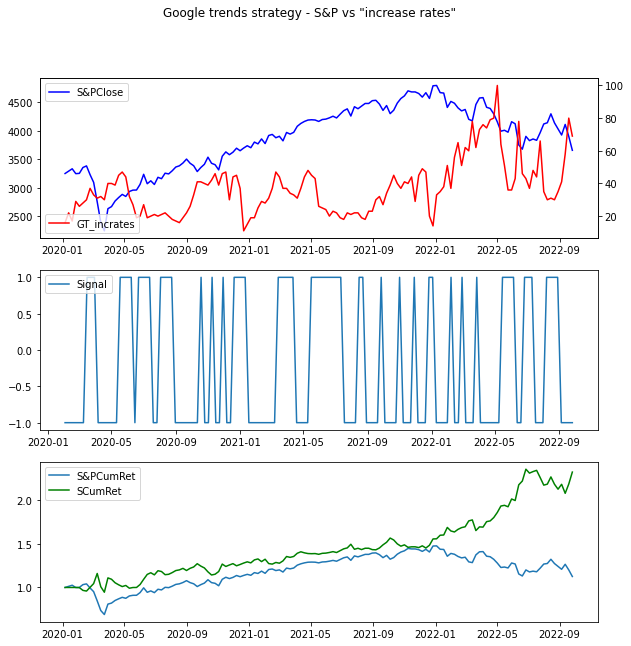

In [110]:
fig, axs = plt.subplots(3,figsize=(10,10))
fig
fig.suptitle('Google trends strategy - S&P vs "increase rates"')
axs0=axs[0].twinx()
axs[0].plot(StrategyDataframe2['Date'], StrategyDataframe2['Close'],color='blue',label='S&PClose') 
axs0.plot(StrategyDataframe2['Date'], StrategyDataframe2['debt'],color='red',label='GT_incrates')
axs[1].plot(StrategyDataframe2['Date'],StrategyDataframe2['Signal'],label='Signal')
axs[2].plot(StrategyDataframe2['Date'],StrategyDataframe2['SPCumRet'],label='S&PCumRet')
axs[2].plot(StrategyDataframe2['Date'],StrategyDataframe2['SCumRet'],color='green',label='SCumRet')
axs[0].legend(loc='upper left')
axs0.legend(loc='lower left')
axs[1].legend(loc='upper left')
axs[2].legend(loc='upper left')